In [1]:
# !pip install nilearn
import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
from sklearn.preprocessing import StandardScaler
import nibabel as nib
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 11) # this needs to be modified for some tasks
print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_data().ravel())) - 1))
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = StandardScaler().fit_transform(brain_data.ext_vars.age[:, None])[:, 0] # gives subject age on standard units after z-scoring


     |████████████████████████████████| 10.0 MB 6.5 MB/s 


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 874356736 of 905208634 bytes (96.6%,    0.8s remaining) ...done. (24 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)



Dataset created in /root/nilearn_data/craddock_2012



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/craddock_2012/45a4e574a5c116b8be81d080bdaa0814/craddock_2011_parcellations.tar.gz..... done.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0


119 regions found in this atlas


[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[-0.9143698095446613, -0.9093943635724637, -0.5450017677133085, -0.8071618939933505, -0.8867269418959847, -0.9931802563307988, -1.226670845903135, -1.2880642295589935, -0.7449130599039924, -0.5153028436538836]
[-0.07743970876834028, 0.28988570693007565, 0.5407839497390521, 0.38625908687492805, 0.42769907567371035, 0.09201258330341067, 0.03526125259423363, 0.07965962751434585, 0.27224830570291036, 0.29529435941907234]


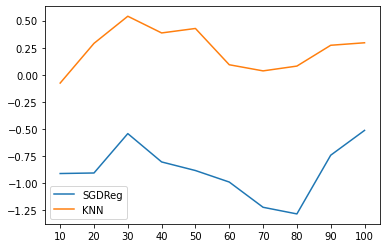

In [4]:
def plot_each_n_neigh(i):
  ############## note no bootstrap, just taking the first 80% of 100 subjects, that is the first 80 subjects as training set ############

  train_input = input_variables[:80,:i]
  train_output = output_variable[:80]

  test_input = input_variables[80:,:i]
  test_output = output_variable[80:]

  Logmodel = SGDRegressor(penalty='l2',alpha=0.05).fit(train_input,train_output)
  KNN = KNeighborsRegressor(n_neighbors=3).fit(train_input,train_output)
  log_predict_output = Logmodel.predict(test_input)
  KNN_predict_output = KNN.predict(test_input)
  log_accuracy = r2_score(test_output, log_predict_output)
  KNN_accuracy = r2_score(test_output, KNN_predict_output)


  return i, KNN_accuracy, log_accuracy


x_list = [] ### n_rois
log_y_list = [] ### accuracy
KNN_y_list = []

for i in range (10,110,10):
  i, KNN_accuracy, log_accuracy = plot_each_n_neigh(i)

  # print("i: ", i,"accuracy: ", accuracy)
  x_list.append(i)
  log_y_list.append(log_accuracy)
  KNN_y_list.append(KNN_accuracy)

print(x_list)
print(log_y_list)
print(KNN_y_list)
plt.xticks(x_list)
plt.plot(x_list,log_y_list,label='SGDReg')
plt.plot(x_list,KNN_y_list,label='KNN')
plt.legend()
plt.show()